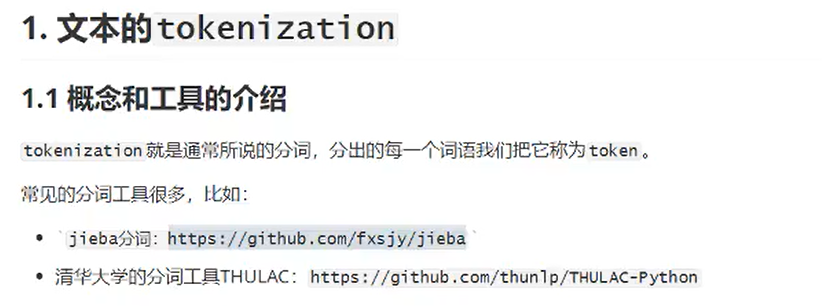

In [5]:
import jieba 
text='时隔6年，“伴我同行”系列惊喜回归大银幕，也将成为整个系列的最后一部结局之作。根据最新释出的定档海报及预告，《伴我同行2》承接了上一部中大雄静香确定恋爱关系的剧情，两人即将走入婚姻的殿堂。从哆啦A梦故事开始距今50周年，这对童年玩伴终于长大，爱情长跑即将结束，但大雄人生愿望能否达成？他们究竟能否顺利完婚？此外，《伴我同行2》改编自原作漫画《奶奶的回忆》，电影中大雄奶奶首次亮相，不少粉丝推测这又将是一部情感充沛极富泪点的感人之作。'
cuted=jieba.lcut(text)
[cuted[i:i+2] for i in range(len(cuted)-1)]

[['时隔', '6'],
 ['6', '年'],
 ['年', '，'],
 ['，', '“'],
 ['“', '伴'],
 ['伴', '我'],
 ['我', '同行'],
 ['同行', '”'],
 ['”', '系列'],
 ['系列', '惊喜'],
 ['惊喜', '回归'],
 ['回归', '大'],
 ['大', '银幕'],
 ['银幕', '，'],
 ['，', '也'],
 ['也', '将'],
 ['将', '成为'],
 ['成为', '整个'],
 ['整个', '系列'],
 ['系列', '的'],
 ['的', '最后'],
 ['最后', '一部'],
 ['一部', '结局'],
 ['结局', '之作'],
 ['之作', '。'],
 ['。', '根据'],
 ['根据', '最新'],
 ['最新', '释出'],
 ['释出', '的'],
 ['的', '定'],
 ['定', '档'],
 ['档', '海报'],
 ['海报', '及'],
 ['及', '预告'],
 ['预告', '，'],
 ['，', '《'],
 ['《', '伴'],
 ['伴', '我'],
 ['我', '同行'],
 ['同行', '2'],
 ['2', '》'],
 ['》', '承接'],
 ['承接', '了'],
 ['了', '上'],
 ['上', '一部'],
 ['一部', '中大雄'],
 ['中大雄', '静香'],
 ['静香', '确定'],
 ['确定', '恋爱'],
 ['恋爱', '关系'],
 ['关系', '的'],
 ['的', '剧情'],
 ['剧情', '，'],
 ['，', '两人'],
 ['两人', '即将'],
 ['即将', '走入'],
 ['走入', '婚姻'],
 ['婚姻', '的'],
 ['的', '殿堂'],
 ['殿堂', '。'],
 ['。', '从'],
 ['从', '哆'],
 ['哆', '啦'],
 ['啦', 'A'],
 ['A', '梦'],
 ['梦', '故事'],
 ['故事', '开始'],
 ['开始', '距今'],
 ['距今', '50'],
 ['50', '周年'],
 ['周年', '，'],
 [

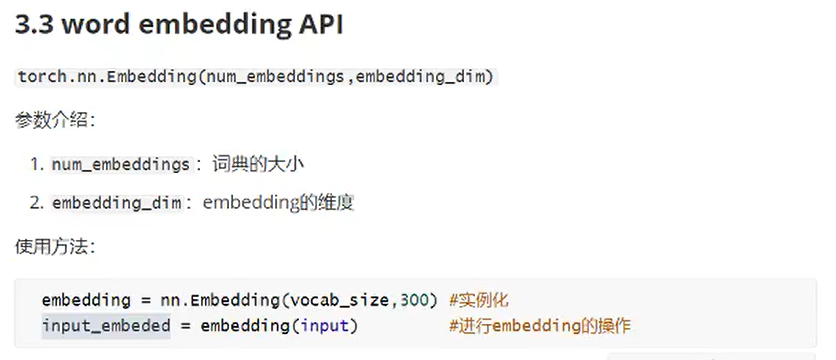

In [1]:
import torch.nn as nn 
import torch
from torch.utils.data import Dataset,DataLoader
import os
import re
import numpy as np
# embedding = nn.Embedding(vocab_size,300)
# input_embeded = embedding(input_data)

In [2]:
max_len=30
def tokenlize(content):
    content=re.sub("<.*?>"," ",content)
    filters = ['\t','\n','\x97','\x96','#','$','%','&',"]"]
    content=re.sub("|".join(filters)," ",content)
    tokens = [i.strip().lower() for i in content.split()] #.lower()变为小写
    return tokens
#     strip： 用来去除头尾字符、空白符(包括\n、\r、\t、' '，即：换行、回车、制表符、空格)
#     lstrip：用来去除开头字符、空白符(包括\n、\r、\t、' '，即：换行、回车、制表符、空格)
#     rstrip：用来去除结尾字符、空白符(包括\n、\r、\t、' '，即：换行、回车、制表符、空格)

class myDataset(Dataset):
    def __init__(self,train=True):
        self.train_data_path=r'‪D:\数据分析题目\pytorch数据\aclImdb\train'
        self.test_data_path =r'D:\数据分析题目\pytorch数据\aclImdb\test'
        data_path = self.train_data_path if train else self.test_data_path
        
        #把所有文件名放入列表
        temp_data_path=[os.path.join(data_path,"pos").strip('\u202a'),os.path.join(data_path,"neg").strip('\u202a')]
        self.total_file_path=[]
        for path in temp_data_path:
            file_name_list = os.listdir(path)
            file_path_list = [os.path.join(path,i)for i in file_name_list if i.endswith('txt')]#if i.endswith('txt')只取以txt结尾的文件
            self.total_file_path.extend(file_path_list)
            
    def __getitem__(self,index):
        file_path = self.total_file_path[index]
        #获取Label
        label_str = file_path.split("\\")[-2]
        label =0 if label_str=='neg' else 1
        #获取内容
        content=open(file_path, encoding='utf-8').read()
        return tokenlize(content),label
    def __len__(self):
        return len(self.total_file_path)
def get_dataloader(train=True):
    imdb_datasets = myDataset(train=train)
    data_loader  = DataLoader(imdb_datasets,batch_size=128,shuffle=True,collate_fn=collate_fn)
    return data_loader
def collate_fn(batch):
    content,label = list(zip(*batch))
    content = [ws.transform(i,max_len=max_len)for i in content]
    content = np.array(content)
    content = torch.LongTensor(np.array(content))
    label = torch.LongTensor(label)
    return content,label
# if __name__ =='__main__':
#     for idx,(inputs,target) in enumerate(get_dataloader()):
#         print(idx)
# #         print(inputs)
# #         print(target)

In [3]:
#构建词典，实现方法，将词语转化成数字序列和其翻转
class word2sequence():
    UNK_TAG = "UNK"
    PAD_TAG = "PAD"
    
    UNK = 0
    PAD = 1
    def __init__(self):
        UNK_TAG = "UNK"
        PAD_TAG = "PAD"
    
        UNK = 0
        PAD = 1
        self.dict={UNK_TAG:self.UNK,PAD_TAG:self.PAD}
        self.count = {} #统计词频
    def fit(self,sentence):
        #把单个句子放到dict中
        for word in sentence:
            self.count[word] = self.count.get(word,0)+1 #n.get(i,0)找到键i对应的值，如果i不存在就设置默认为0
    def bulid_vocab(self,min=5,max=None,max_features=None):
        #生成词典,最小出现的次数最大出现的次数，max_features最后保留的个数
        
        #删除count中词频小于min的词语
        if min is not None:
            self.count={word:value for word,value in self.count.items() if value >=min}
        #删除count中词频大于max的词语
        if max is not None:
            self.count={word:value for word,value in self.count.items() if value <=max}
        #限制保留的词语数
        if max_features is not None:
            temp=sorted(self.count.items(),key=lambda x:x[-1],reverse=True)[:max_features]
            self.count = dict(temp)
        for word in self.count:
            self.dict[word] = len(self.dict)
        #得到一个翻转的字典
        self.inverse_dict = dict(zip(self.dict.values(),self.dict.keys()))
    def transform(self,sentence,max_len=None):
        if max_len is not None:
            if max_len > len(sentence):
                sentence = sentence + [self.PAD_TAG]*(max_len-len(sentence))
            if max_len < len(sentence):
                sentence = sentence[:max_len] #裁减
        #将句子转化成序列
        return [self.dict.get(word,self.UNK) for word in sentence]
    def inverse_trnasform(self,indices):
        return [self.inverse_dict.get(idx) for idx in indices]
# if __name__ =="__main__":
#     ws = word2sequence()
#     ws.fit(["我","是","谁"])
#     ws.fit(['我','是','我'])
#     ws.bulid_vocab(min=0)
#     ret=ws.transform(sentence=['我','是','是'],max_len=10)
#     god=ws.inverse_trnasform(ret)
#     print(god,ret)

In [4]:
#报存模型
import pickle
import os 
from tqdm import tqdm
ws = word2sequence()
path = r'‪D:\数据分析题目\pytorch数据\aclImdb\train'
temp_data_path=[os.path.join(path,"pos").strip('\u202a'),os.path.join(path,"neg").strip('\u202a')]
for data_path in temp_data_path:
    file_path=[os.path.join(data_path,i)for i in os.listdir(data_path) if i.endswith('txt')]
    for file in tqdm(file_path): ##tqdm看循环进度
        sentences = tokenlize(open(file, encoding='utf-8').read())
        ws.fit(sentences)
ws.bulid_vocab(min=10)
with open(r'./modelws.pkl','wb') as file:
    pickle.dump(ws,file)

100%|██████████████████████████████████████████████████████████████████████████| 12500/12500 [00:04<00:00, 3034.75it/s]


In [5]:
print(ws.dict)

{'UNK': 0, 'PAD': 1, 'high': 2, 'is': 3, 'a': 4, 'cartoon': 5, 'comedy.': 6, 'it': 7, 'ran': 8, 'at': 9, 'the': 10, 'same': 11, 'time': 12, 'as': 13, 'some': 14, 'other': 15, 'programs': 16, 'about': 17, 'school': 18, 'life,': 19, 'such': 20, 'my': 21, '35': 22, 'years': 23, 'in': 24, 'teaching': 25, 'profession': 26, 'lead': 27, 'me': 28, 'to': 29, 'believe': 30, 'that': 31, 'satire': 32, 'much': 33, 'closer': 34, 'reality': 35, 'than': 36, 'survive': 37, 'insightful': 38, 'students': 39, 'who': 40, 'can': 41, 'see': 42, 'right': 43, 'through': 44, 'their': 45, 'pathetic': 46, 'of': 47, 'whole': 48, 'situation,': 49, 'all': 50, 'remind': 51, 'schools': 52, 'i': 53, 'knew': 54, 'and': 55, 'students.': 56, 'when': 57, 'saw': 58, 'episode': 59, 'which': 60, 'student': 61, 'repeatedly': 62, 'tried': 63, 'burn': 64, 'down': 65, 'school,': 66, 'immediately': 67, 'recalled': 68, 'high.': 69, 'classic': 70, 'line:': 71, "i'm": 72, 'here': 73, 'sack': 74, 'one': 75, 'your': 76, 'welcome': 77, 

In [6]:
data=pickle.load(open(r'./modelws.pkl','rb'))
data.dict
len(data.dict)

26766

In [7]:
data.dict

{'UNK': 0,
 'PAD': 1,
 'high': 2,
 'is': 3,
 'a': 4,
 'cartoon': 5,
 'comedy.': 6,
 'it': 7,
 'ran': 8,
 'at': 9,
 'the': 10,
 'same': 11,
 'time': 12,
 'as': 13,
 'some': 14,
 'other': 15,
 'programs': 16,
 'about': 17,
 'school': 18,
 'life,': 19,
 'such': 20,
 'my': 21,
 '35': 22,
 'years': 23,
 'in': 24,
 'teaching': 25,
 'profession': 26,
 'lead': 27,
 'me': 28,
 'to': 29,
 'believe': 30,
 'that': 31,
 'satire': 32,
 'much': 33,
 'closer': 34,
 'reality': 35,
 'than': 36,
 'survive': 37,
 'insightful': 38,
 'students': 39,
 'who': 40,
 'can': 41,
 'see': 42,
 'right': 43,
 'through': 44,
 'their': 45,
 'pathetic': 46,
 'of': 47,
 'whole': 48,
 'situation,': 49,
 'all': 50,
 'remind': 51,
 'schools': 52,
 'i': 53,
 'knew': 54,
 'and': 55,
 'students.': 56,
 'when': 57,
 'saw': 58,
 'episode': 59,
 'which': 60,
 'student': 61,
 'repeatedly': 62,
 'tried': 63,
 'burn': 64,
 'down': 65,
 'school,': 66,
 'immediately': 67,
 'recalled': 68,
 'high.': 69,
 'classic': 70,
 'line:': 71,
 "

In [8]:
#构建模型

import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.optim import Adam 
class MyModels(nn.Module):
    def __init__(self):
        super(MyModels,self).__init__()
        self.embedding = nn.Embedding(len(data.dict),100)
        self.fc = nn.Linear(max_len*100,200)
        self.fc2 = nn.Linear(200,2)
        # embedding = nn.Embedding(vocab_size,300)
        # input_embeded = embedding(input_data)
    def forward(self,inputs):
        x = self.embedding(inputs)     #进行embedded 操作，形状[batch_size,max_len,100]
        print(x.shape)
        x=x.view([-1,max_len*100])
        out = self.fc2(self.fc(x))
        return F.log_softmax(out,dim=-1)
model = MyModels()
optimizer = Adam(model.parameters(),0.001)
def train(epoch):
    for idx,(inputss,target) in enumerate(get_dataloader(train=True)):
        optimizer.zero_grad()
        output=model(inputss)
        loss= F.nll_loss(output,target)
        loss.backward()
        optimizer.step()
        print(loss.item())
train(2)

torch.Size([128, 30, 100])
0.7337191104888916
torch.Size([128, 30, 100])
0.7400786280632019
torch.Size([128, 30, 100])
0.8424361944198608
torch.Size([128, 30, 100])
0.8850778341293335
torch.Size([128, 30, 100])
0.9550278782844543
torch.Size([128, 30, 100])
0.8632371425628662
torch.Size([128, 30, 100])
0.9321510791778564
torch.Size([128, 30, 100])
0.8507859706878662
torch.Size([128, 30, 100])
0.8729432821273804
torch.Size([128, 30, 100])
1.023242473602295
torch.Size([128, 30, 100])
0.8830629587173462
torch.Size([128, 30, 100])
0.8396522998809814
torch.Size([128, 30, 100])
0.8922537565231323
torch.Size([128, 30, 100])
0.9062104225158691
torch.Size([128, 30, 100])
0.8429596424102783
torch.Size([128, 30, 100])
0.8593389391899109
torch.Size([128, 30, 100])
0.8102478981018066
torch.Size([128, 30, 100])
0.8238902688026428
torch.Size([128, 30, 100])
0.8163855671882629
torch.Size([128, 30, 100])
0.801918089389801
torch.Size([128, 30, 100])
0.7386816143989563
torch.Size([128, 30, 100])
0.8053003

0.7240003943443298
torch.Size([128, 30, 100])
0.6655513644218445
torch.Size([128, 30, 100])
0.6694972515106201
torch.Size([128, 30, 100])
0.6762100458145142
torch.Size([128, 30, 100])
0.6647621393203735
torch.Size([128, 30, 100])
0.6576215624809265
torch.Size([128, 30, 100])
0.6847463250160217
torch.Size([128, 30, 100])
0.6543060541152954
torch.Size([128, 30, 100])
0.6583802700042725
torch.Size([128, 30, 100])
0.6974479556083679
torch.Size([128, 30, 100])
0.6718238592147827
torch.Size([128, 30, 100])
0.670846700668335
torch.Size([128, 30, 100])
0.6885337829589844
torch.Size([128, 30, 100])
0.686152994632721
torch.Size([128, 30, 100])
0.6758644580841064
torch.Size([128, 30, 100])
0.6876651048660278
torch.Size([128, 30, 100])
0.6619043350219727
torch.Size([40, 30, 100])
0.6674015522003174


### 循环神经网络实现情感分类,LSTM

### 双向LSTM
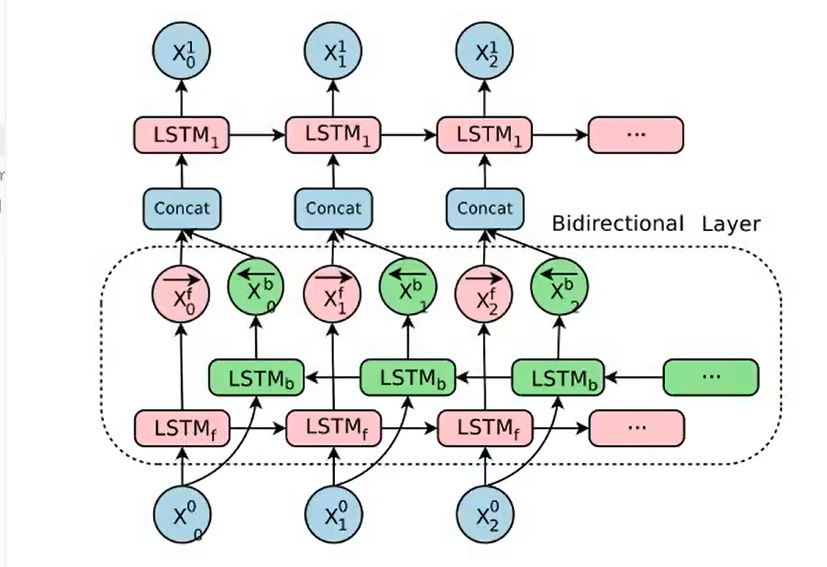

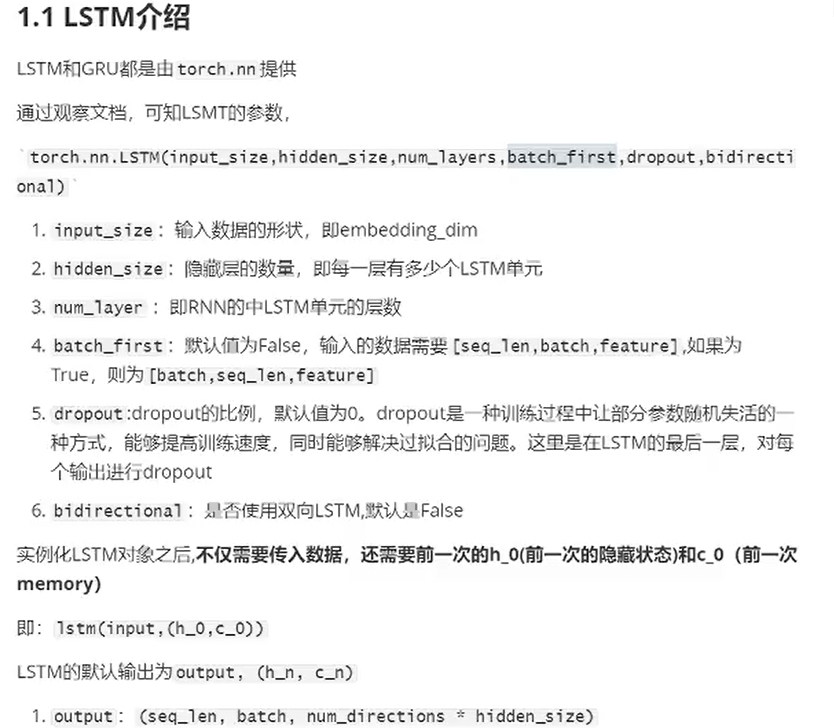

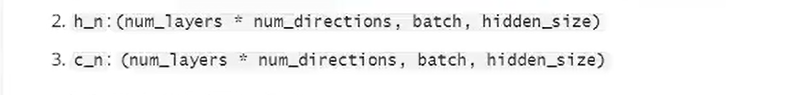

In [31]:
# 假设输入为input[10,20],embedding为[100,30]
batch_size=10
seq_len =20
embedding_dim=30
word_vocab=100
hidden_size = 18
num_layer = 2 #两层lstm

In [60]:
import torch.nn as nn
batch_size=10
seq_len =20 #句子的长度
embedding_dim=30 #词典的数量
word_vocab=100 #用长度为30的向量表示的100个不同词语
hidden_size = 20
num_layer = 1
#构造一个数据
inputs = torch.randint(low=0,high=100,size=(batch_size,seq_len))
#数据经过embediing 处理
embedding = nn.Embedding(word_vocab,embedding_dim)
input_embedded = embedding(inputs)

#将embedding之后的数据传入lstm
lstm = nn.LSTM(input_size=embedding_dim,hidden_size=hidden_size,num_layers=num_layer,batch_first=True)
output,(h_n,c_n)=lstm(input_embedded)
print(output.size())
print("*"*100)
print(h_n.size())
print(c_n.size())

torch.Size([10, 20, 20])
****************************************************************************************************
torch.Size([1, 10, 20])
torch.Size([1, 10, 20])


In [59]:
lstm = nn.LSTM(input_size=embedding_dim,hidden_size=hidden_size,num_layers=num_layer,batch_first=True,bidirectional=True)
output,(h_n,c_n)=lstm(input_embedded)
print(output.size())
print("*"*100)
print(h_n.size())
print(c_n.size())

torch.Size([10, 20, 36])
****************************************************************************************************
torch.Size([2, 10, 18])
torch.Size([2, 10, 18])


In [63]:
## 获取最后一个时间步上的输出
last_output= output[:,-1,:]
#最后一次的hidde_state
last_hidden_state=h_n[-1,:,:]

In [68]:
last_output==last_hidden_state

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True],
        [True, True, True, 

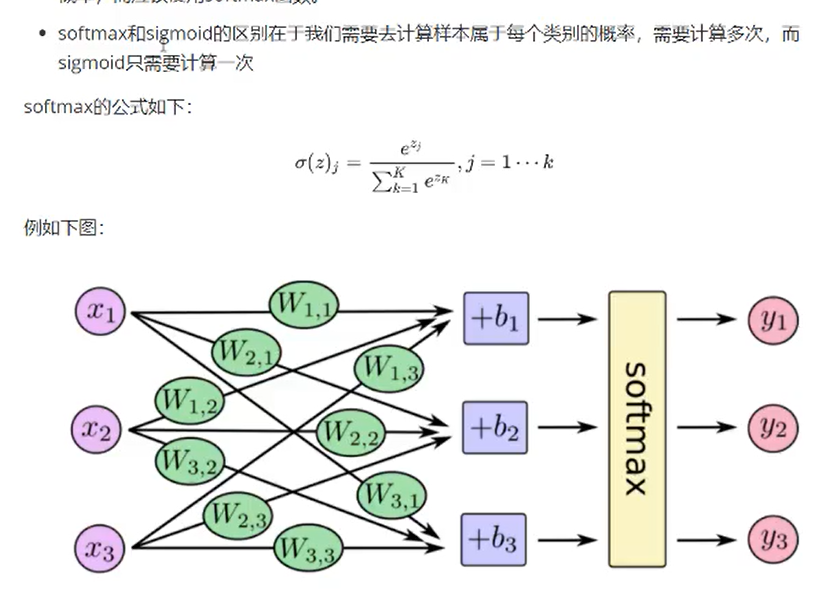

### 完成前面的情感分类

In [16]:
from torch.optim import Adam 
class IMyDataSET(nn.Module):
    def __init__(self):
        super(IMyDataSET,self).__init__()
        self.embedding=nn.Embedding(len(data.dict),100)
        self.lstm=nn.LSTM(input_size=100,hidden_size=512,num_layers=2,batch_first=True,bidirectional=True,dropout=0.5)
        self.fc=nn.Linear(512*2,2)
    def forward(self,inputs):
        x = self.embedding(inputs)
        x,(h_n,c_n) = self.lstm(x)
        #可以尝试获取两个方向最后一次的output进行concat
        out_put_f = h_n[-2,:,:] #正向最后一次的输出
        out_put_b = h_n[-1,:,:] #反向最后一次的输出
        x=torch.cat([out_put_f,out_put_b],dim=-1)
        out = self.fc(x)
        return F.log_softmax(out,dim=-1)
model = IMyDataSET().to('cuda')
optimizer = Adam(model.parameters(),0.001)
def train(epoch):
    for idx,(inputss,target) in enumerate(get_dataloader(train=True)):
        optimizer.zero_grad()
        inputss = inputss.to("cuda")
        target = target.to("cuda")
        output=model(inputss)
        loss= F.nll_loss(output,target)
        loss.backward()
        optimizer.step()
        print(loss.item())
for i in range(10):
    train(i)

0.6948537230491638
0.7009878754615784
0.6921052932739258
0.6971725225448608
0.7242037057876587
0.6994208693504333
0.6988018751144409
0.7033005356788635
0.6832543015480042
0.6955773830413818
0.6980350613594055
0.6950294375419617
0.6949238181114197
0.6851404309272766
0.6909821629524231
0.6887425780296326
0.6856247186660767
0.6776232123374939
0.7113931775093079
0.683533787727356
0.6790555715560913
0.6792417168617249
0.6909745335578918
0.6646459102630615
0.6975748538970947
0.6871168613433838
0.6962417364120483
0.6790422201156616
0.6824283599853516
0.677812397480011
0.6765731573104858
0.6798981428146362
0.6568393707275391
0.6681126952171326
0.6506389379501343
0.6686729192733765
0.7072561383247375
0.6912325620651245
0.708975613117218
0.642516553401947
0.6804797649383545
0.6597203016281128
0.6902266144752502
0.6540054678916931
0.6919958591461182
0.6445675492286682
0.7082752585411072
0.6677414178848267
0.6998677849769592
0.6602866053581238
0.6464682221412659
0.6520400047302246
0.70486748218536

0.552206814289093
0.5184958577156067
0.44247668981552124
0.4839259386062622
0.5837304592132568
0.5320751070976257
0.4947059452533722
0.5353548526763916
0.5189568400382996
0.4273083209991455
0.5518545508384705
0.5179064273834229
0.511649489402771
0.45458632707595825
0.5214024186134338
0.4962356984615326
0.46065273880958557
0.5436201095581055
0.5088591575622559
0.589368462562561
0.5154966711997986
0.4099555015563965
0.4822310507297516
0.4950396418571472
0.4116872251033783
0.4646753966808319
0.567532479763031
0.40861013531684875
0.4778268337249756
0.5382543206214905
0.5257742404937744
0.4892145097255707
0.5190421938896179
0.527350664138794
0.47344157099723816
0.5438647270202637
0.5710757374763489
0.4945220351219177
0.47989434003829956
0.49690496921539307
0.4520743787288666
0.4897952377796173
0.5308266878128052
0.5323229432106018
0.47173091769218445
0.5277514457702637
0.4831300377845764
0.48750168085098267
0.5320931673049927
0.4890737533569336
0.549997866153717
0.4702436029911041
0.4555007

0.29895687103271484
0.3654139041900635
0.27705976366996765
0.3150297701358795
0.3383570909500122
0.3199790120124817
0.34771987795829773
0.275499552488327
0.43720752000808716
0.26447781920433044
0.28462451696395874
0.3599637448787689
0.5384327173233032
0.27606600522994995
0.29851603507995605
0.307494193315506
0.34212514758110046
0.31794121861457825
0.25006303191185
0.42244821786880493
0.4229452610015869
0.2548850476741791
0.3993738293647766
0.35010629892349243
0.41706445813179016
0.30056172609329224
0.35982757806777954
0.4100587069988251
0.3773650825023651
0.31237754225730896
0.35072094202041626
0.32469290494918823
0.3434962332248688
0.32406845688819885
0.45162853598594666
0.3291567265987396
0.3262144923210144
0.22299040853977203
0.41604337096214294
0.3240671753883362
0.4363354742527008
0.29855969548225403
0.34218209981918335
0.3346613049507141
0.3450663089752197
0.3630402386188507
0.3159117102622986
0.30440405011177063
0.3230328857898712
0.300979346036911
0.2683871388435364
0.361032545

0.09405600279569626
0.17151252925395966
0.17849192023277283
0.0866294875741005
0.09314250946044922
0.14184686541557312
0.06712887436151505
0.19834181666374207
0.11848931759595871
0.13026154041290283
0.09955587983131409
0.11647623032331467
0.16618476808071136
0.07287014275789261
0.1514308899641037
0.10485672205686569
0.054428063333034515
0.15750467777252197
0.10883954167366028
0.065680593252182
0.13385209441184998
0.05008365958929062
0.0889987125992775
0.07486265897750854
0.15669941902160645
0.10295949131250381
0.17103329300880432
0.147450789809227
0.19456008076667786
0.14840126037597656
0.09809361398220062
0.0707252025604248
0.1254047006368637
0.10810727626085281
0.1523687094449997
0.1398613601922989
0.16469256579875946
0.12716688215732574
0.12819549441337585
0.11641594767570496
0.1258670538663864
0.20618832111358643
0.09340238571166992
0.09595168381929398
0.10321778804063797
0.19751431047916412
0.07871989905834198
0.15878824889659882
0.1034097969532013
0.11271613091230392
0.1008580550

0.03920324519276619
0.07692468911409378
0.05782128497958183
0.016660135239362717
0.026006918400526047
0.07889144867658615
0.03982049226760864
0.035985417664051056
0.041892651468515396
0.05891618877649307
0.007841382175683975
0.040911965072155
0.03877469152212143
0.038048915565013885
0.01813177391886711
0.045698247849941254
0.04306009039282799
0.06026514992117882
0.02715984359383583
0.02794087678194046
0.052870865911245346
0.035779424011707306
0.01581541821360588
0.017456309869885445
0.04916700720787048
0.06352090835571289
0.05345315486192703
0.015667514875531197
0.05075111240148544
0.044380687177181244
0.06231442093849182
0.03251815214753151
0.05172747001051903
0.09699041396379471
0.06649379432201385
0.0104760667309165
0.12647081911563873
0.025937631726264954
0.03589709848165512
0.05989956855773926
0.07874209433794022
0.026402123272418976
0.04304429888725281
0.014769171364605427
0.031451284885406494
0.0278024822473526
0.07078171521425247
0.04845508188009262
0.03836098685860634
0.023254

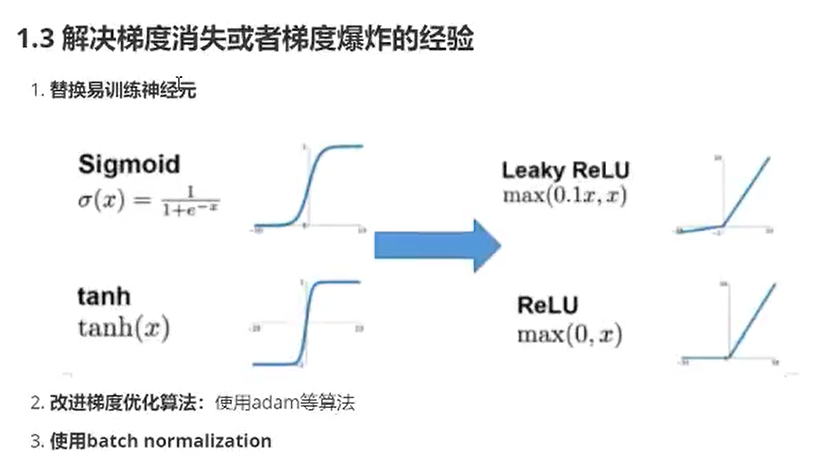

### 梯度消失：梯度太小，数据无法表示（计算精度太小超过计算机最小范围）
### 梯度爆炸：梯度太大，大到数据无法表示（计算量太大计算机算不了）

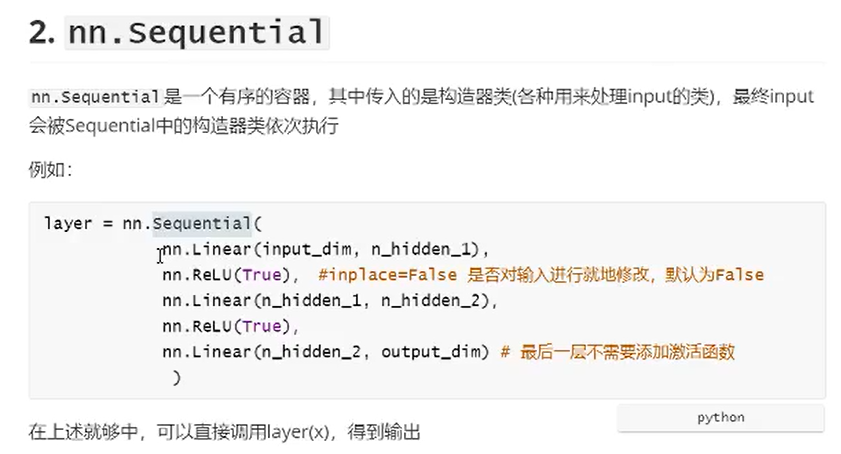

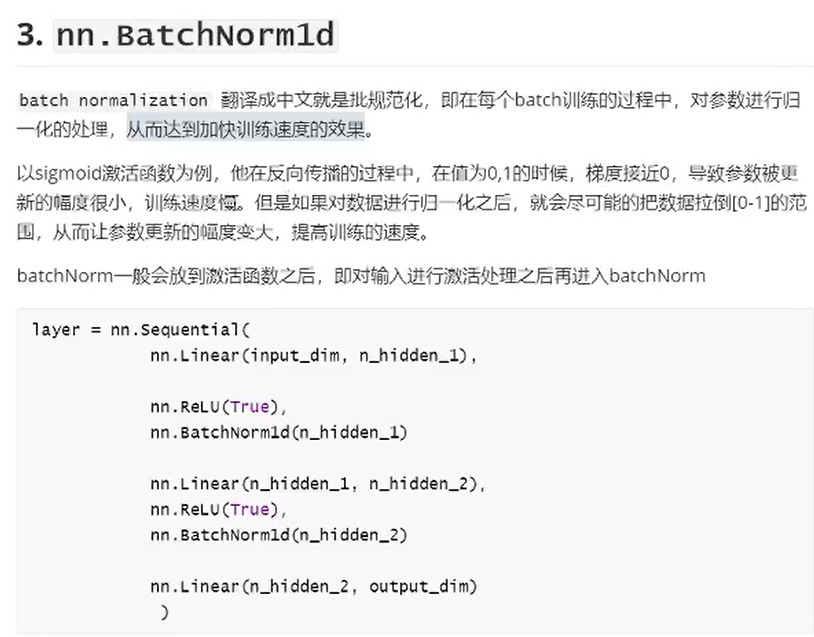

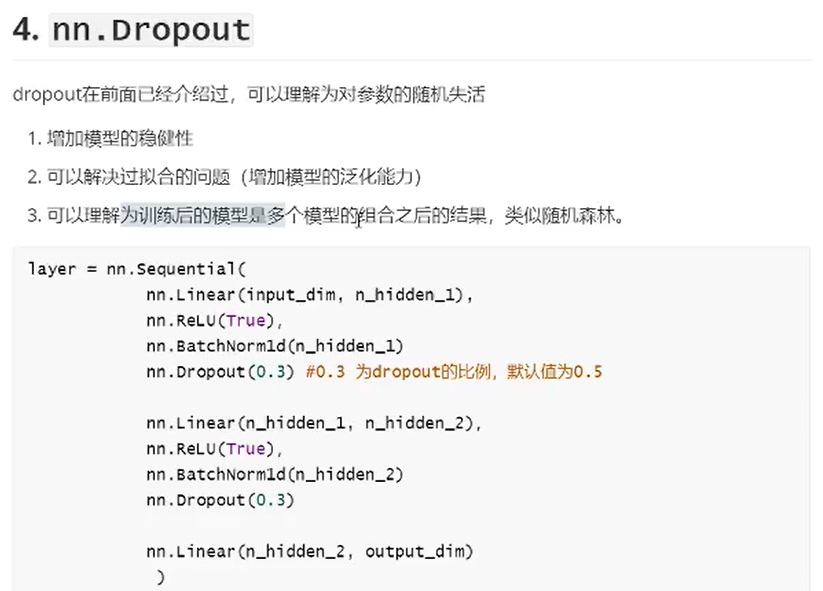